<a href="https://colab.research.google.com/github/Hubert26/suicides_IPPAN/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liblaries and settings

In [83]:
import pandas as pd
import numpy as np

#Ustawienie braku maksymalnej ilości wyświetlanych kolumn
pd.options.display.max_columns = None

import os
import shutil
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

np.random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Function definitions

## display_info

In [27]:
def display_info(df, selected_columns):
    print(selected_columns)
    print(len(selected_columns))
    for col_name in selected_columns:

        # Mode
        print("\nMode:")
        print(df[col_name].mode())

        # NaN count
        nan_count = df[col_name].isna().sum()
        print("\nNaN count:", nan_count)

        # Unique values len
        print("\nUnique values len:")
        print(len(df[col_name].unique()))

        # Unique values
        print("\nUnique values:")
        print(df[col_name].unique())

        # Value counts
        print("\nValue counts:")
        print(df[col_name].value_counts())

        print("\n" + "=" * 40)  # Separator between columns


## create_bar_plot

In [28]:
def create_bar_plot(x_values, y_values, x_label, y_label, title, x_rotation=0):

    # Tworzenie wykresu słupkowego
    plt.bar(x_values, y_values)

    # Dodanie wartości nad słupkami
    for i in range(len(x_values)):
        plt.text(x_values[i], y_values[i], str(y_values[i]), ha='center', va='bottom')

    # Dodanie tytułu i etykiet osi
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Wyświetlenie wykresu
    plt.xticks(rotation=x_rotation, ha='right')
    plt.tight_layout()
    plt.show()


##create_double_bar_plot

In [29]:
def create_double_bar_plot(x_values, y_values1, y_values2, x_label, y_label, title, x_rotation=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Tworzenie dwóch subplotów obok siebie

    # Utworzenie słupków dla obu serii danych
    bars1 = ax1.bar(x_values, y_values1, label='Series 1')
    bars2 = ax2.bar(x_values, y_values2, label='Series 2')

    # Dodanie wartości nad słupkami dla serii 1
    for bar in bars1:
        height = bar.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Dodanie wartości nad słupkami dla serii 2
    for bar in bars2:
        height = bar.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Dodanie tytułów i etykiet osi
    ax1.set_title(title)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_xticklabels(x_values, rotation=x_rotation, ha='right')

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_xticklabels(x_values, rotation=x_rotation, ha='right')

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()

#Data exploration

In [30]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/Hubert26/suicides_IPPAN/main/data/preped_samobojstwa_2013_2022.csv', delimiter=',', low_memory=False)

In [31]:
df_raw.head()

,ID_samobójcy,Data_raportu,Przedział_wiekowy,Płeć,Stan_cywilny,Wykształcenie,Informacje_o_pracy_i_nauce,Źródło_utrzymania,Czy_samobójstwo_zakończyło_się_zgonem,Miejsce_zamachu,Sposób_popełnienia,Stan_świadomości,Informacje_o_używaniu_substancji,Informacje_dotyczące_leczenia_z_powodu_alkoholizmu/narkomanii,Data_raportu_rok,Data_raportu_miesiąc,Liczba_powodów_zamachu
0,"114581552,00",1.2013,NaN,Mężczyzna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,0
1,"114584284,00",1.2013,13-18,Mężczyzna,NaN,NaN,Uczeń,NaN,1.0,Droga/ulica/chodnik,Rzucenie się pod pojazd w ruchu,NaN,NaN,NaN,2013,1,0
2,"114584293,00",1.2013,13-18,Kobieta,Kawaler/panna,Podstawowe,Uczeń,Na utrzymaniu innej osoby,1.0,Inne,Rzucenie się z wysokości,NaN,NaN,NaN,2013,1,0
3,"114584312,00",1.2013,19-24,Mężczyzna,Kawaler/panna,NaN,NaN,NaN,1.0,NaN,Inny,NaN,NaN,NaN,2013,1,1
4,"114584399,00",1.2013,40-44,Mężczyzna,Kawaler/panna,NaN,Bezrobotny,NaN,1.0,Zabudowania gospodarcze,Powieszenie się,Pod wpływem alkoholu,NaN,NaN,2013,1,0


In [32]:
df_reasons_of_attack = pd.read_csv('https://raw.githubusercontent.com/Hubert26/suicides_IPPAN/main/data/preped_powod_zamachu_samobojstwa_2013_2022.csv', delimiter=',', low_memory=False)

In [33]:
df_reasons_of_attack.head()

,Powód_zamachu_Konflikt z osobami spoza rodziny,"Powód_zamachu_Nosiciel wirusa HIV, chory na AIDS",Powód_zamachu_Choroba psychiczna/zaburzenia psychiczne,Powód_zamachu_Złe warunki ekonomiczne/długi,Powód_zamachu_Nagła utrata źródła utrzymania,Powód_zamachu_Zagrożenie lub utrata miejsca zamieszkania,Powód_zamachu_Inny niewymieniony,Powód_zamachu_Choroba fizyczna,Powód_zamachu_Dokonanie przestępstwa lub wykroczenia,Powód_zamachu_Problemy w szkole lub pracy,Powód_zamachu_Niepożądana ciąża,Powód_zamachu_Trwałe kalectwo,Powód_zamachu_Pogorszenie lub nagła utrata zdrowia,Powód_zamachu_Zawód miłosny,"Powód_zamachu_Mobbing, cybermobbing, znęcanie",Powód_zamachu_Śmierć bliskiej osoby,Powód_zamachu_Przewlekła choroba,Powód_zamachu_Nieporozumienie rodzinne/przemoc w rodzinie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df_data = df_raw.copy()

In [35]:
df_data['Liczba_powodów_zamachu'] = df_data['Liczba_powodów_zamachu'].replace(0, np.nan)

In [36]:
df_data['Data_raportu_rok'] = df_data['Data_raportu_rok'].astype(str)
df_data['Data_raportu_miesiąc'] = df_data['Data_raportu_miesiąc'].astype(str)


##NaN exploration in variables

In [37]:
df_data.shape

(113196, 17)

In [38]:
df_data['Czy_samobójstwo_zakończyło_się_zgonem'].sum()

54537.0

In [40]:
df_data[df_data['ID_samobójcy'].duplicated()].ID_samobójcy #Sprawdzenie duplikatów

Series([], Name: ID_samobójcy, dtype: object)

In [41]:
##Brakujące dane
total = df_data.isnull().sum().sort_values(ascending=False)
percent = 100*(df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [42]:
missing_data

,Total,Percent
Informacje_dotyczące_leczenia_z_powodu_alkoholizmu/narkomanii,108281,95.657974
Informacje_o_używaniu_substancji,93753,82.823598
Wykształcenie,77929,68.844305
Stan_świadomości,58827,51.969151
Informacje_o_pracy_i_nauce,55930,49.409873
Źródło_utrzymania,49338,43.586346
Liczba_powodów_zamachu,40204,35.517156
Stan_cywilny,14345,12.672709
Przedział_wiekowy,1288,1.137849
Miejsce_zamachu,106,0.093643


##NaN exploration in rows

In [43]:
nan_counts = df_data.isna().sum(axis=1).value_counts()

In [44]:
full_index = list(range(0, len(df_data.columns.tolist()) + 1))

# Zsumowanie istniejących wartości z pełną listą i ustawienie brakujących wartości na 0
nan_counts = nan_counts.reindex(full_index, fill_value=0)

# Sortowanie wyników rosnąco
nan_counts = nan_counts.sort_index()

In [45]:
nan_counts_proc = (nan_counts / len(df_data)) * 100

In [46]:
missing_data_rows = pd.concat([nan_counts, nan_counts_proc], axis=1, keys=['Total', 'Percent'])
missing_data_rows

,Total,Percent
0,83,0.073324
1,3861,3.410898
2,15260,13.481042
3,19139,16.907841
4,19904,17.583660
5,21458,18.956500
6,17762,15.691367
7,11506,10.164670
8,3883,3.430333
9,263,0.232340


In [47]:
# Usunięcie wierszy są NaN
selected_index = df_data[df_data['Płeć'].isna() | df_data['Przedział_wiekowy'].isna()].index

df_data = df_data.drop(index=selected_index)
df_reasons_of_attack = df_reasons_of_attack.drop(index=selected_index)

##data_age_groups

In [56]:
age_groups = sorted(list(set(df_data['Przedział_wiekowy'])))
columns = df_data.columns.to_list()

In [90]:
new_df_data = pd.DataFrame()

for age_group in age_groups:
  selected_index = df_data.loc[df_data['Przedział_wiekowy'] == age_group].index
  data_age_group = df_data.loc[selected_index]
  data_age_group_reasons_of_attack = df_reasons_of_attack.loc[selected_index]

  total = data_age_group.isnull().sum().sort_values(ascending=False)
  percent = 100*(data_age_group.isnull().sum()/data_age_group.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  columns = list(set(columns).intersection(set(missing_data[missing_data['Percent'] < 75].index)))

  female_index = data_age_group.loc[data_age_group['Płeć'] == 'Kobieta'].index
  male_index = data_age_group.loc[data_age_group['Płeć'] == 'Mężczyzna'].index

  for variable in columns:
    female_serie_indexes = data_age_group.loc[female_index, variable].dropna().value_counts().index.tolist()
    female_serie_values = data_age_group.loc[female_index, variable].dropna().value_counts().values.tolist()
    female_probabilities = [x / sum(female_serie_values) for x in female_serie_values]
    female_null_index = female_index[data_age_group.loc[female_index, variable].isnull()]
    data_age_group.loc[female_null_index, variable] = np.random.choice(female_serie_indexes, size=len(female_null_index.tolist()), p=female_probabilities)

    male_serie_indexes = data_age_group.loc[male_index, variable].dropna().value_counts().index.tolist()
    male_serie_values = data_age_group.loc[male_index, variable].dropna().value_counts().values.tolist()
    male_probabilities = [x / sum(male_serie_values) for x in male_serie_values]
    male_null_index = male_index[data_age_group.loc[male_index, variable].isnull()]
    data_age_group.loc[male_null_index, variable] = np.random.choice(male_serie_indexes, size=len(male_null_index.tolist()), p=male_probabilities)


  serie_indexes = data_age_group_reasons_of_attack.columns.tolist()

  female_series = data_age_group_reasons_of_attack.loc[female_index, serie_indexes].sum().tolist()
  female_probabilities = [x / sum(female_series) for x in female_series]
  # Lista do przechowywania wylosowanych wartości dla każdej wartości w zmiennej
  selected_values = []

  # Iteracja przez wartości w zmiennej
  for value in data_age_group.loc[female_null_index, variable]:
      # Losowanie wartości zgodnie z podanymi prawdopodobieństwami
      selected_value = np.random.choice(serie_indexes, size=int(value), p=female_probabilities)
      selected_values.append(selected_value)
  # Iteracja przez indeksy i wartości w kolumnie reason_of_attack_count
  for idx, selected_value in zip(female_null_index, selected_values):
      # Iteracja przez wylosowane wartości
      for column_name in selected_value:
          # Ustawienie wartości 1 w odpowiednich kolumnach
          data_age_group_reasons_of_attack.loc[idx, column_name] = 1

  male_series = data_age_group_reasons_of_attack.loc[male_index, serie_indexes].sum().tolist()
  male_probabilities = [x / sum(male_series) for x in male_series]
  # Lista do przechowywania wylosowanych wartości dla każdej wartości w zmiennej
  selected_values = []

  # Iteracja przez wartości w zmiennej
  for value in data_age_group.loc[male_null_index, variable]:
      # Losowanie wartości zgodnie z podanymi prawdopodobieństwami
      selected_value = np.random.choice(serie_indexes, size=int(value), p=male_probabilities)
      selected_values.append(selected_value)
  # Iteracja przez indeksy i wartości w kolumnie reason_of_attack_count
  for idx, selected_value in zip(male_null_index, selected_values):
      # Iteracja przez wylosowane wartości
      for column_name in selected_value:
          # Ustawienie wartości 1 w odpowiednich kolumnach
          data_age_group_reasons_of_attack.loc[idx, column_name] = 1

  combined_df = pd.concat([data_age_group, data_age_group_reasons_of_attack], axis=0)
  file_name = 'data_age_group_' + age_group + '.csv'
  combined_df.to_csv(file_name, index=False)
  files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####DTC

In [ ]:
data_age_group_dummies = pd.get_dummies(data_age_group)

In [ ]:
data_age_group_dummies.head()

,is_fatal,reason_of_attack_count,"reasons_of_attack_Bullying, cyberbullying, harassment",reasons_of_attack_Chronic illness,reasons_of_attack_Committing a crime or misdemeanor,reasons_of_attack_Conflict with non-family members,reasons_of_attack_Death of a close person,reasons_of_attack_Deterioration or sudden loss of health,reasons_of_attack_Family misunderstanding/family violence,"reasons_of_attack_HIV carrier, AIDS patient",reasons_of_attack_Love affair,reasons_of_attack_Mental illness/mental disorders,reasons_of_attack_Other unspecified,reasons_of_attack_Permanent disability,reasons_of_attack_Physical illness,reasons_of_attack_Poor economic conditions/debt,reasons_of_attack_School or work problems,reasons_of_attack_Sudden loss of livelihood,reasons_of_attack_Threat or loss of housing,reasons_of_attack_Unwanted pregnancy,report_date_year_2013,report_date_year_2014,report_date_year_2015,report_date_year_2016,report_date_year_2017,report_date_year_2018,report_date_year_2019,report_date_year_2020,report_date_year_2021,report_date_year_2022,report_date_month_1,report_date_month_10,report_date_month_11,report_date_month_12,report_date_month_2,report_date_month_3,report_date_month_4,report_date_month_5,report_date_month_6,report_date_month_7,report_date_month_8,report_date_month_9,gender_female,gender_male,marital_status_Divorced,marital_status_In a relationship,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,education_Incomplete primary education,education_Lower secondary education,education_Post-secondary non-tertiary education,education_Primary education,education_Secondary education,education_Tertiary education,education_Vocational education,work_study_info_Blue-collar worker,work_study_info_Farmer,work_study_info_Full-time employment,work_study_info_Part-time employment,work_study_info_Self-employed,work_study_info_Unemployed,work_study_info_White-collar worker,livelihood_source_Dependent on another person,livelihood_source_Employed,livelihood_source_No regular source of maintenance,"livelihood_source_Pension, retirement, benefit, or alimony",location_of_attack_Apartment/house,"location_of_attack_Basement, attic, garage corridor",location_of_attack_Educational and care facility,location_of_attack_Legal isolation place,location_of_attack_Medical facility or sanatorium,location_of_attack_Other,location_of_attack_Outbuildings,location_of_attack_Park/forest,location_of_attack_Police facility,location_of_attack_Railway area/tracks,"location_of_attack_River, lake, other water body",location_of_attack_Road/street/sidewalk,location_of_attack_School/University,location_of_attack_Workplace,method_of_committing_Damaging the circulatory system,method_of_committing_Drowning,method_of_committing_Gas/pollutant poisoning,method_of_committing_Hanging,method_of_committing_Ingesting other drugs,method_of_committing_Ingesting poison,method_of_committing_Ingesting sleeping pills/psychotropic drugs,method_of_committing_Jumping from a height,method_of_committing_Other,method_of_committing_Other forms of self-mutilation,method_of_committing_Poisoning with chemicals/toxic substances,method_of_committing_Poisoning with narcotic substances,method_of_committing_Self-immolation,method_of_committing_Shooting oneself/using firearms,method_of_committing_Strangulation,method_of_committing_Superficial self-mutilation,method_of_committing_Throwing oneself under a moving vehicle,consciousness_state_Sober,consciousness_state_Under the influence of alcohol,consciousness_state_Under the influence of alcohol and intoxicants,consciousness_state_Under the influence of alcohol and medications,"consciousness_state_Under the influence of alcohol and psychotropic substances (drugs, etc.)",consciousness_state_Under the influence of intoxicants,consciousness_state_Under the influence of medications,consciousness_state_Under the influence of medications and intoxicants,"consciousness_state_Under the influence of psychotropic subst

In [ ]:
Y = data_age_group_dummies['is_fatal']
X = data_age_group_dummies.drop('is_fatal', axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

from imblearn.over_sampling import SMOTE

# Wykorzystanie SMOTE do zrównoważenia zbioru treningowego
smote = SMOTE(sampling_strategy=1.0, random_state=42, k_neighbors=4)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Sprawdzenie, czy liczność klas jest teraz zrównoważona
unique, counts = np.unique(y_train, return_counts=True)
print('Liczność klas treningowych', dict(zip(unique, counts)))

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

Liczność klas treningowych {0.0: 1416, 1.0: 1416}
X_train.shape (2832, 108)
X_test.shape (5697, 108)
y_train.shape (2832,)
y_test.shape (5697,)


#####Grid Search

In [ ]:
dtc = DecisionTreeClassifier()

# Definicja siatki parametrów do przeszukiwania
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],  # Minimalna liczba próbek do podziału węzła
    'min_samples_leaf': [1, 2, 4]  # Minimalna liczba próbek w liściu
}

# Inicjalizacja przeszukiwania
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Przeszukiwanie przestrzeni parametrów
grid_search.fit(X_train, y_train)

# Najlepsze znalezione parametry
best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Ostateczna ocena modelu na zbiorze testowym
accuracy = grid_search.score(X_test, y_test)
print("Dokładność na zbiorze testowym:", accuracy)

Najlepsze parametry: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Dokładność na zbiorze testowym: 0.7726873793224505


In [ ]:
dtc = DecisionTreeClassifier(
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'])

dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

#####Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, dtc_y_pred)
plot_confusion_matrix(cm,'Decision Tree')

#####Clasification report

In [ ]:
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      2324
         1.0       0.79      0.85      0.82      3373

    accuracy                           0.77      5697
   macro avg       0.77      0.76      0.76      5697
weighted avg       0.77      0.77      0.77      5697



#####ROC Curve

In [ ]:
plot_roc_curve(y_test, dtc_y_pred, 'Decision Tree')

#####Validation

In [ ]:
dtc_mv = model_validation(y_test, dtc_y_pred, 'dtc_mv')
display(dtc_mv)

,accuracy,precision,recall,f1,AUROC,fpr,fnr
dtc_mv,0.77339,0.771711,0.77339,0.770986,0.757039,0.331756,0.154165


In [ ]:
# Zakładając, że masz już zdefiniowany model dtc i wczytane dane X

importances = dtc.feature_importances_

# Sortowanie cech według ważności
sorted_indices = importances.argsort()[::-1]
for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")


method_of_committing_Hanging: 0.6400134312101166
method_of_committing_Jumping from a height: 0.03875379246963675
marital_status_Single: 0.02201639511213156
method_of_committing_Shooting oneself/using firearms: 0.01806003625486753
work_study_info_Full-time employment: 0.01672896697089739
work_study_info_Unemployed: 0.013566209491977258
reasons_of_attack_Other unspecified: 0.013558158884292319
location_of_attack_Railway area/tracks: 0.013464090249487875
education_Tertiary education: 0.012566714695955779
method_of_committing_Drowning: 0.011448838289714264
location_of_attack_Apartment/house: 0.010789789828273732
reason_of_attack_count: 0.01067902202736664
livelihood_source_Employed: 0.009576841081105692
consciousness_state_Under the influence of alcohol: 0.00928654547076965
consciousness_state_Sober: 0.0091299358591484
reasons_of_attack_Family misunderstanding/family violence: 0.00908130277131057
report_date_year_2019: 0.008263570984572529
report_date_year_2020: 0.0077228056732193415
consc

##### Decission Tree DOT

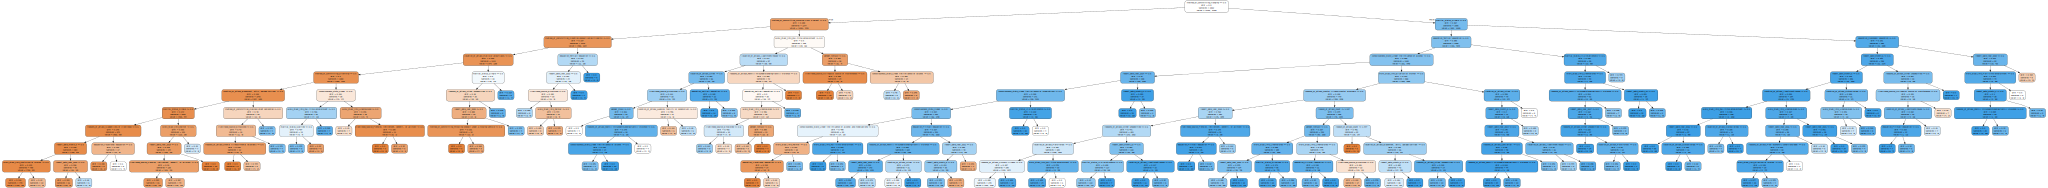

In [ ]:
# Eksportowanie drzewa do pliku DOT
export_graphviz(dtc, out_file='tree.dot', feature_names=X_train.columns, filled=True, rounded=True)

# Konwersja pliku DOT na obraz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#graphviz.Source(dot_graph).render("decision_tree", format="png")